# $\tau$ generator for EMCAL trigger

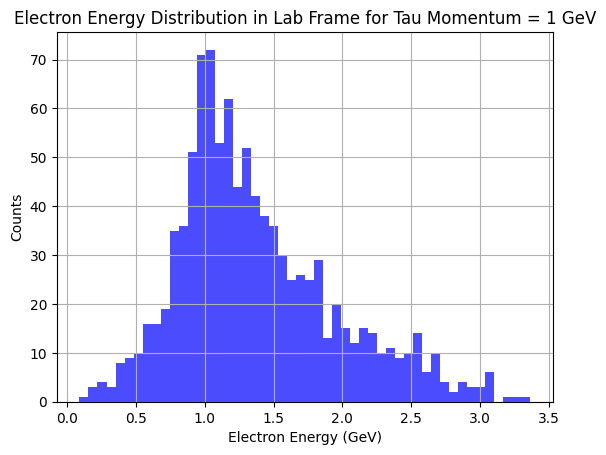

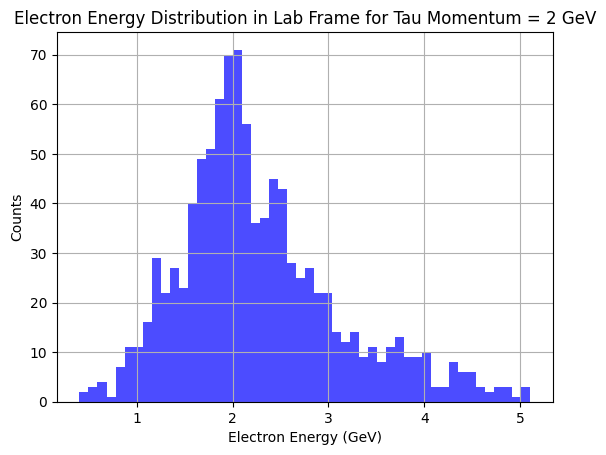

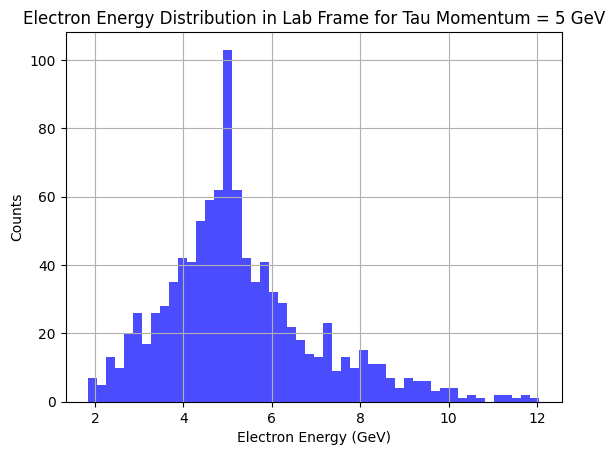

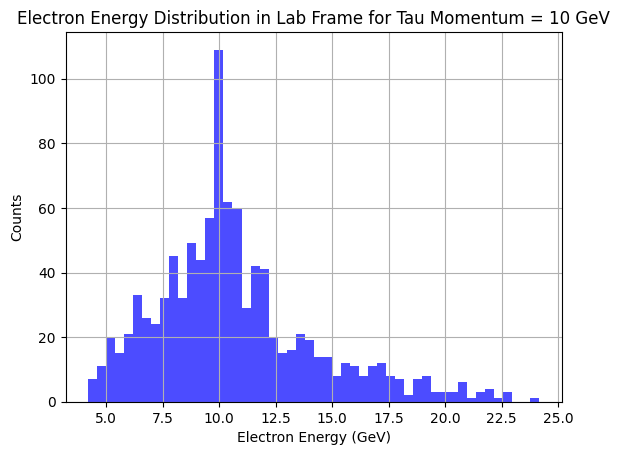

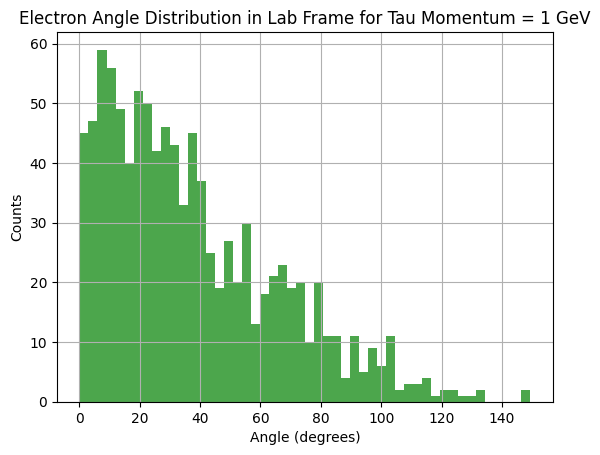

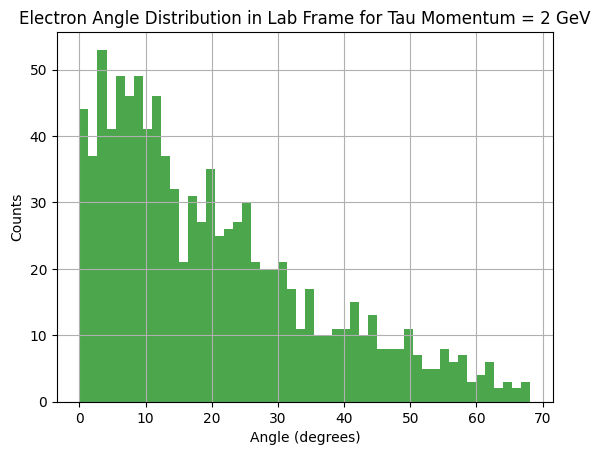

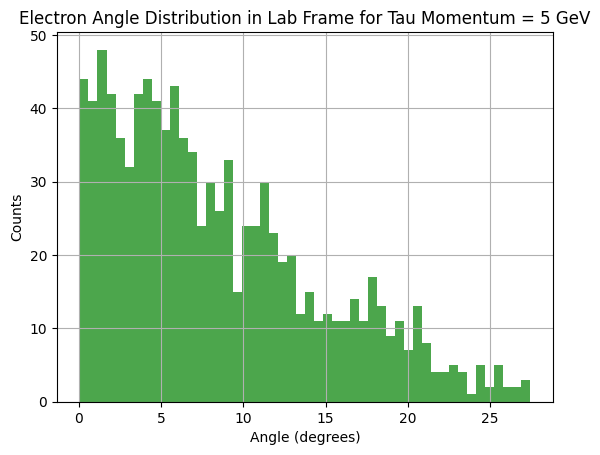

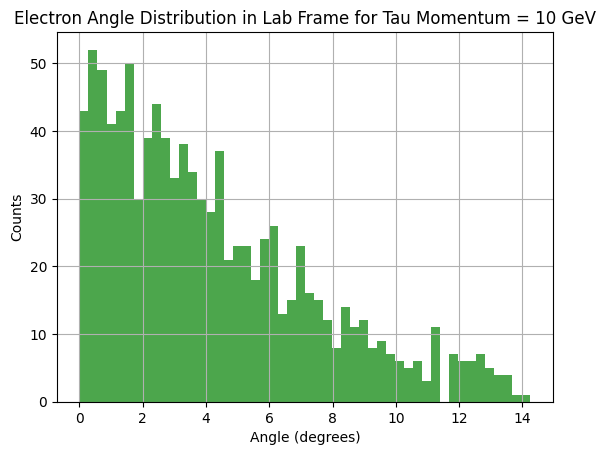

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m_tau = 1.77686  # Tau lepton mass in GeV/c^2
m_electron = 0.000511  # Electron mass in GeV/c^2
m_nu = 0.0  # Neutrinos are considered massless for simplicity

def isotropic_three_body_decay(mother_mass, daughter_mass1, daughter_mass2, daughter_mass3):
    """Simulates an isotropic three-body decay, distributing energy and momentum according to phase space constraints."""
    total_energy_available = (mother_mass - daughter_mass1 - daughter_mass2 - daughter_mass3)
    
    if total_energy_available <= 0:
        raise ValueError("Insufficient mass for a three-body decay.")
    
    available_energy1 = np.random.uniform(0, total_energy_available)
    available_energy2 = np.random.uniform(0, total_energy_available - available_energy1)
    available_energy3 = total_energy_available - available_energy1 - available_energy2
    
    E1 = daughter_mass1 + available_energy1
    E2 = daughter_mass2 + available_energy2
    E3 = daughter_mass3 + available_energy3

    # Compute momenta from energies
    p1 = np.sqrt(E1**2 - daughter_mass1**2)
    p2 = np.sqrt(E2**2 - daughter_mass2**2)
    p3 = np.sqrt(E3**2 - daughter_mass3**2)
    
    # Random angles for isotropic decay
    theta1 = np.arccos(2 * np.random.rand() - 1)
    phi1 = 2 * np.pi * np.random.rand()
    
    theta2 = np.arccos(2 * np.random.rand() - 1)
    phi2 = 2 * np.pi * np.random.rand()
    
    # Calculate momenta in 3D (isotropic decay)
    p1_vec = np.array([p1 * np.sin(theta1) * np.cos(phi1), p1 * np.sin(theta1) * np.sin(phi1), p1 * np.cos(theta1)])
    p2_vec = np.array([p2 * np.sin(theta2) * np.cos(phi2), p2 * np.sin(theta2) * np.sin(phi2), p2 * np.cos(theta2)])
    p3_vec = -p1_vec - p2_vec  # Momentum conservation
    
    return p1_vec, p2_vec, p3_vec, E1, E2, E3

def lorentz_boost(p, E_parent, m_parent):
    """Lorentz boosts a 3-momentum vector p from the rest frame to the lab frame along the z-axis."""
    gamma = E_parent / m_parent
    beta = np.sqrt(1 - (1 / gamma**2))
    
    p_parallel = p[2]
    p_perpendicular = np.sqrt(p[0]**2 + p[1]**2)
    
    # Boost the z-component of the momentum
    p_parallel_lab = gamma * (p_parallel + beta * np.sqrt(p_parallel**2 + m_parent**2))
    
    return np.array([p[0], p[1], p_parallel_lab])

# Simulate tau decay
def generate_tau_decay_to_electron(p_tau_lab):
    """
    Simulate tau decay (tau -> electron + neutrinos) in the tau rest frame, then boost it to the lab frame.
    p_tau_lab: momentum of tau in the lab frame.
    """
    E_tau_lab = np.sqrt(p_tau_lab**2 + m_tau**2)
    
    # Simulate three-body decay in the rest frame of the tau
    p_electron_rest, p_nu_e_rest, p_nu_tau_rest, E_electron_rest, E_nu_e_rest, E_nu_tau_rest = \
        isotropic_three_body_decay(m_tau, m_electron, m_nu, m_nu)

    # Lorentz boost the electron to the lab frame
    p_electron_lab = lorentz_boost(p_electron_rest, E_tau_lab, m_tau)
    electron_energy_lab = np.sqrt(np.sum(p_electron_lab**2) + m_electron**2)
    
    return electron_energy_lab, p_electron_lab

def compute_angle_between_tau_and_electron(p_tau_lab, p_electron_lab):
    """Computes the angle between the tau and electron momenta in the lab frame."""
    tau_magnitude = np.linalg.norm(p_tau_lab)
    electron_magnitude = np.linalg.norm(p_electron_lab)
    
    # Dot product to find cos(theta)
    cos_theta = np.dot(p_tau_lab, p_electron_lab) / (tau_magnitude * electron_magnitude)
    cos_theta = np.clip(cos_theta, -1.0, 1.0)  # Numerical stability

    # Angle in radians
    theta = np.arccos(cos_theta)
    return theta

# Function to plot electron energy distribution in the lab frame
def plot_electron_energy_distribution(tau_momenta, num_events=1000):
    for p_tau_lab in tau_momenta:
        electron_energies = []
        for _ in range(num_events):
            electron_energy_lab, _ = generate_tau_decay_to_electron(p_tau_lab)
            electron_energies.append(electron_energy_lab)
        
        plt.figure()
        plt.hist(electron_energies, bins=50, alpha=0.7, color='blue')
        plt.title(f'Electron Energy Distribution in Lab Frame for Tau Momentum = {p_tau_lab} GeV')
        plt.xlabel('Electron Energy (GeV)')
        plt.ylabel('Counts')
        plt.grid(True)
        plt.show()

# Function to plot the angle distribution between tau and electron in the lab frame
def plot_electron_angle_distribution(tau_momenta, num_events=1000):
    for p_tau_lab in tau_momenta:
        electron_angles = []
        for _ in range(num_events):
            # Generate tau and electron momenta
            _, p_electron_lab = generate_tau_decay_to_electron(p_tau_lab)
            
            # Tau momentum vector (assumed along z-axis in the lab)
            p_tau_vec = np.array([0, 0, p_tau_lab])

            # Compute the angle between tau and electron in lab frame
            angle = compute_angle_between_tau_and_electron(p_tau_vec, p_electron_lab)
            electron_angles.append(np.degrees(angle))  # Convert to degrees
        
        plt.figure()
        plt.hist(electron_angles, bins=50, alpha=0.7, color='green')
        plt.title(f'Electron Angle Distribution in Lab Frame for Tau Momentum = {p_tau_lab} GeV')
        plt.xlabel('Angle (degrees)')
        plt.ylabel('Counts')
        plt.grid(True)
        plt.show()

# Example usage for tau momenta: 1 GeV, 2 GeV, 5 GeV, 10 GeV
tau_momenta = [1, 2, 5, 10]
plot_electron_energy_distribution(tau_momenta)
plot_electron_angle_distribution(tau_momenta)
